# OpenCV練習開始

## 画像を読み込む

In [2]:
import numpy as np
import cv2

In [15]:
# 基本の読み込み
img = cv2.imread('img_interviewMovie.jpg',cv2.IMREAD_GRAYSCALE)

In [16]:
# 表示その１
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# 表示その２
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# 保存
cv2.imwrite('img_interviewMovie_gray.png',img)

True

In [19]:
# 画像をグレースケールで読んでウィンドウ表示
# 's'で画像保存してから
# 'esc'で保存せずに
# ウィンドウを閉じる
img = cv2.imread('img_report.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # ESC
    cv2.destroyAllWindows()
elif k == ord('s'): # 's'
    cv2.imwrite('img_report_gray.png',img)
    cv2.destroyAllWindows()

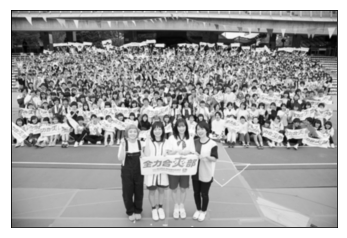

In [21]:
# matplotlibでの表示とか
from matplotlib import pyplot as plt
%matplotlib inline
img = cv2.imread('img_report.jpg',0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

## 動画

In [25]:
# 動画（ファイルから）カメラは後でためそう
cap = cv2.VideoCapture('videoplayback.mp4')
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## マウス

In [28]:
events = [i for i in dir(cv2) if 'EVENT' in i]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [29]:
# mouse callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y), 100, (255,0,0), -1)
        
# create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [33]:
drawing = False # true if mouse is pressed
mode = True # if true, draw rectangle, Press 'm' to toggle to curve
ix, iy = -1, -1

# mouse callback function
def draw_circle2(event, x, y, flags, param):
    global ix, iy, drawing, mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix,iy), (x,y), (0,255,0), -1)
            else:
                cv2.circle(img, (x,y), 5, (0,0,255), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img, (ix,iy), (x,y), (0,255,0), -1)
        else:
            cv2.circle(img, (x,y),5,(0,0,255),-1)

# main
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle2)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

## 顔検出！

In [100]:
import os
import sys

In [99]:
cascade_path="C:\\Users\\xkogi\\.conda\\envs\\myenv\\Lib\\site-packages\\cv2\\data\\"

#face_path='haarcascade_frontalface_alt_tree.xml'
#face_path='haarcascade_frontalface_alt.xml'
#face_path='haarcascade_frontalface_alt_tree.xml'
face_path='haarcascade_frontalface_alt2.xml'
#face_path='haarcascade_frontalface_default.xml'
#face_path='haarcascade_profileface.xml'

eye_path="haarcascade_eye.xml"

#image_file='img_interviewMovie.jpg'
image_file='img_report.jpg'
#image_file='bg_mv_end_pc.jpg'

scale_factor=1.01 #default = 1.1
min_size = (5,5)
min_neighbour=10 #default=3

face_cascade_path=os.path.join(cascade_path,face_path)
eye_cascade_path=os.path.join(cascade_path,eye_path)

assert os.path.isfile(face_cascade_path), face_path+'がない'
assert os.path.isfile(eye_cascade_path), eye_path+'がない'

face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbour, minSize=min_size) # , 1.3, 5)
for(x, y, w, h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.rectangle(img,(0,0),min_size,(0,255,0),3)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 動体検出

In [115]:
cap = cv2.VideoCapture('slow.flv')
#cap = cv2.VideoCapture('videoplayback.mp4')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

In [116]:
# camshift
cap = cv2.VideoCapture('slow.flv')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()